In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


#### Workflow :

- Importing required libraries
- Loading Data Set
- Shape of Data
- Basic Understanding of Data
- Column types and descriptions
- Preprocessing of Data
  - Cleaning of Data 
               - Checking missing values
               - Skewness and Distribution of features and target
               - Detecting outliers using describe() and Boxplot 
               - Handling outliers 
 - Relationship of features with target using scatterplot
 - Feature Selection 
   - Correlation
   - Multicollinearity
 - Seggregation of Training data and test data
 - Building prediction Model 
 - Predictions of test data
 - Model Evaluation 
   - Confusion Matrix
   - Accuracy
   - Precision
   - Recall
   - F1 Score
   - Roc and auc 
   
               
               

### Importing Required Libraries

In [2]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve

### Loading Data Set

In [3]:
df=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Getting shape of data

In [4]:
df.shape

(1025, 14)

#### Basic information of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


####  DataTypes of columns and their Description

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

 all columns are of numeric type 
 
 
 here ,  target column : target(dependent variable) 
 
 
and rest are features (independent variables)

#### Columns descriptions as follows 

- age : age in years
- sex : (1 = male; 0 = female)
- chest pain type (4 values) 
- resting blood pressure : resting blood pressure (in mm Hg on admission to the hospital)
- serum cholestoral in mg/dl 
- fasting blood sugar > 120 mg/dl : (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
- resting electrocardiographic results (values 0,1,2) : resting electrocardiographic results
- thalach: maximum heart rate achieved  
- maximum heart rate achieved
- exang : exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target : 1 or 0



### Preprocessing of Data

#### Cleaning of Data


### Checking missing values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The data has no missing values

### Checking skewness and distributions of the data columns 

In [8]:
## skewness 
df.skew()

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.739768
chol        1.074073
fbs         1.971339
restecg     0.180440
thalach    -0.513777
exang       0.692655
oldpeak     1.210899
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64

 some columns are positively skewed and some are negatively skewed 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

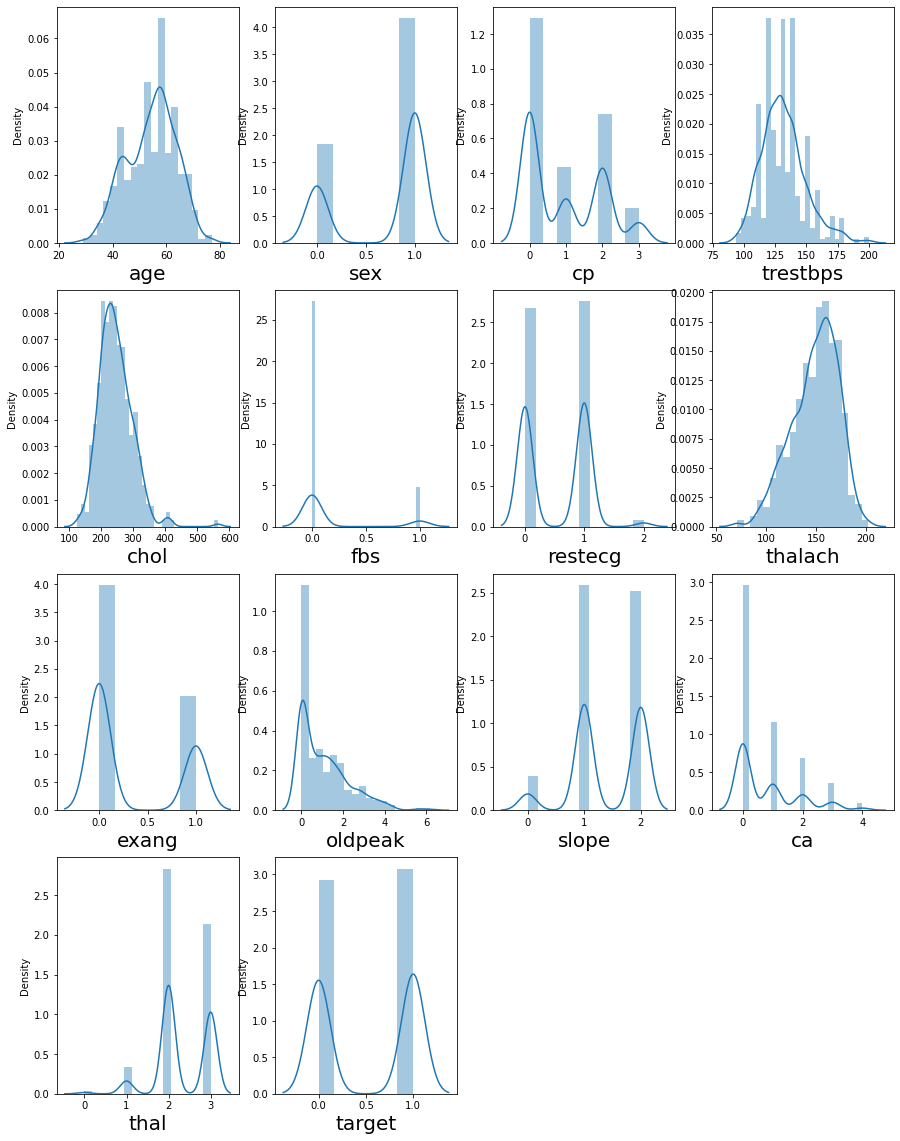

In [9]:
## checking distributions
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<15 : ## 14 columns in data 
        plt.subplot(4,4,plotnumber)## 4 : rows , 4: columns , plotnumber : position of plot
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
        

from above output We can see there is some skewness in the data and means data is not 100% normally distributed




### Detecting outliers  using describe() function and boxplot

In [10]:
## using describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


from above output we can see there is a big difference in chol 75% to max (275 to 564) similarly we can see in thalch,trestbps so it indicated there is an outliers 

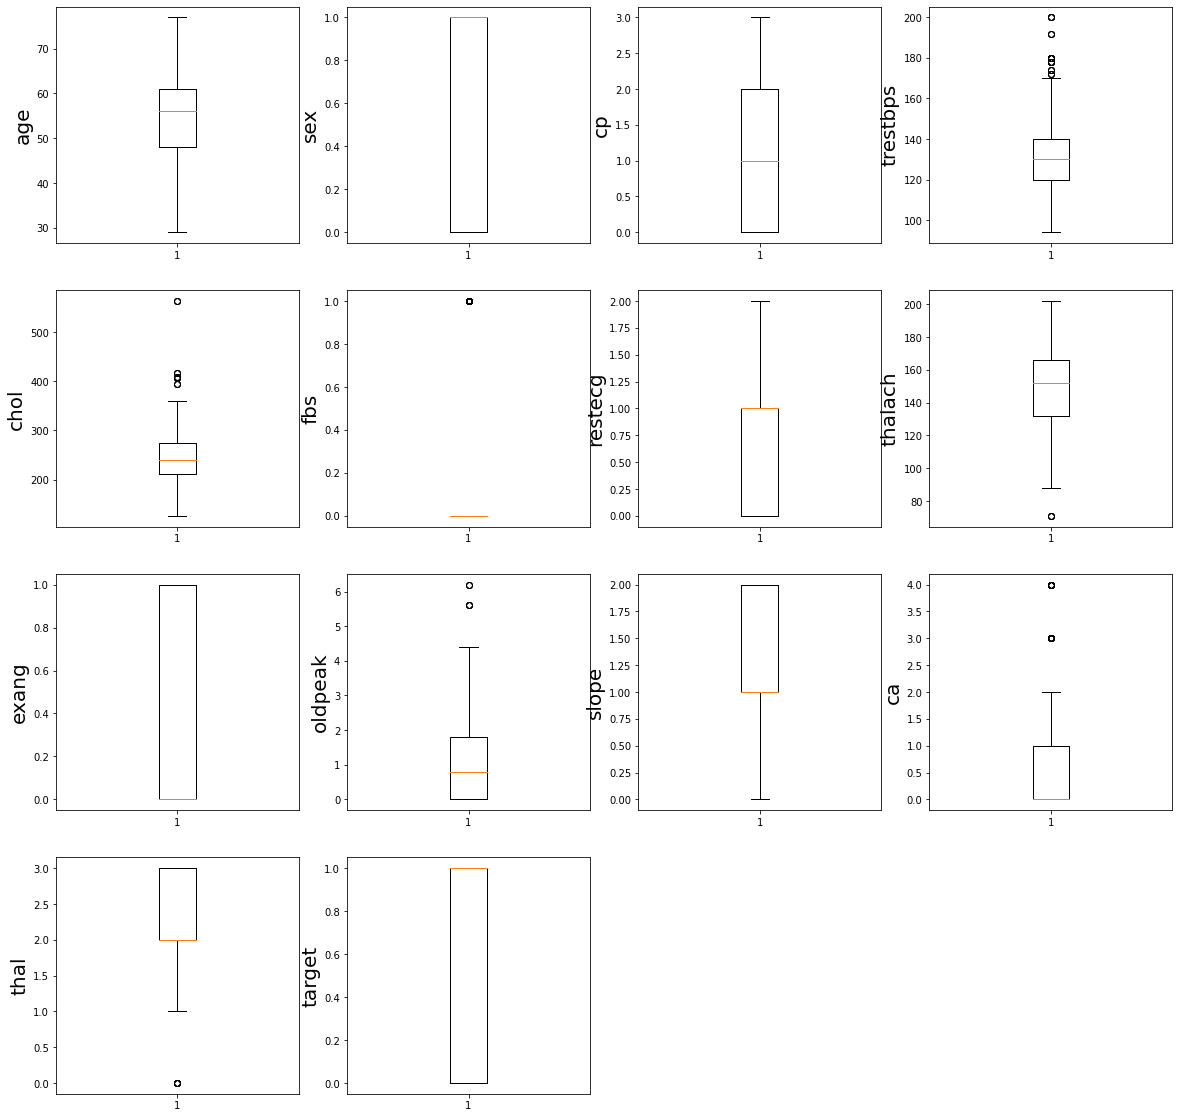

In [11]:
## Using boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in df.columns:
    if plotnumber<15 :     # as there are 14columns in the data
        plt.subplot(4,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
        plt.boxplot(df[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Detecting  and removing outliers from column trestbps

In [12]:
data_cleaned=pd.DataFrame()

IQR_upper_limit for column trestbps : 170
IQR_lower_limit for column trestbps : 90
outliers on right side in trestbps is 
 29     180
47     178
87     174
137    180
151    192
175    200
229    178
246    192
257    180
294    200
326    192
343    172
396    180
436    174
452    178
496    180
508    200
509    180
528    178
609    180
624    178
636    174
679    180
688    200
837    172
891    180
896    178
944    178
971    172
986    180
Name: trestbps, dtype: int64 



{'whiskers': [<matplotlib.lines.Line2D at 0x7f53f4dc2690>,
 'caps': [<matplotlib.lines.Line2D at 0x7f53f4dc2d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f53f4dc2390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f53f4dc7410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f53f4dc7750>],
 'means': []}

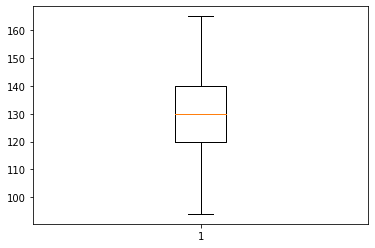

In [13]:
q3=df["trestbps"].quantile(q=0.75)
q1=df["trestbps"].quantile(q=0.25)
IQR=q3-q1
     ## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column trestbps :",IQR_upper_limit)
print("IQR_lower_limit for column trestbps :",IQR_lower_limit)
## find and treating outliers-both lower and upper end
k1=df[df["trestbps"]>IQR_upper_limit]
print("outliers on right side in trestbps is \n",k1["trestbps"],"\n")
data_cleaned=df[df["trestbps"]<IQR_upper_limit]
plt.boxplot(data_cleaned["trestbps"])

### now checking  again outliers in rest of the columns 

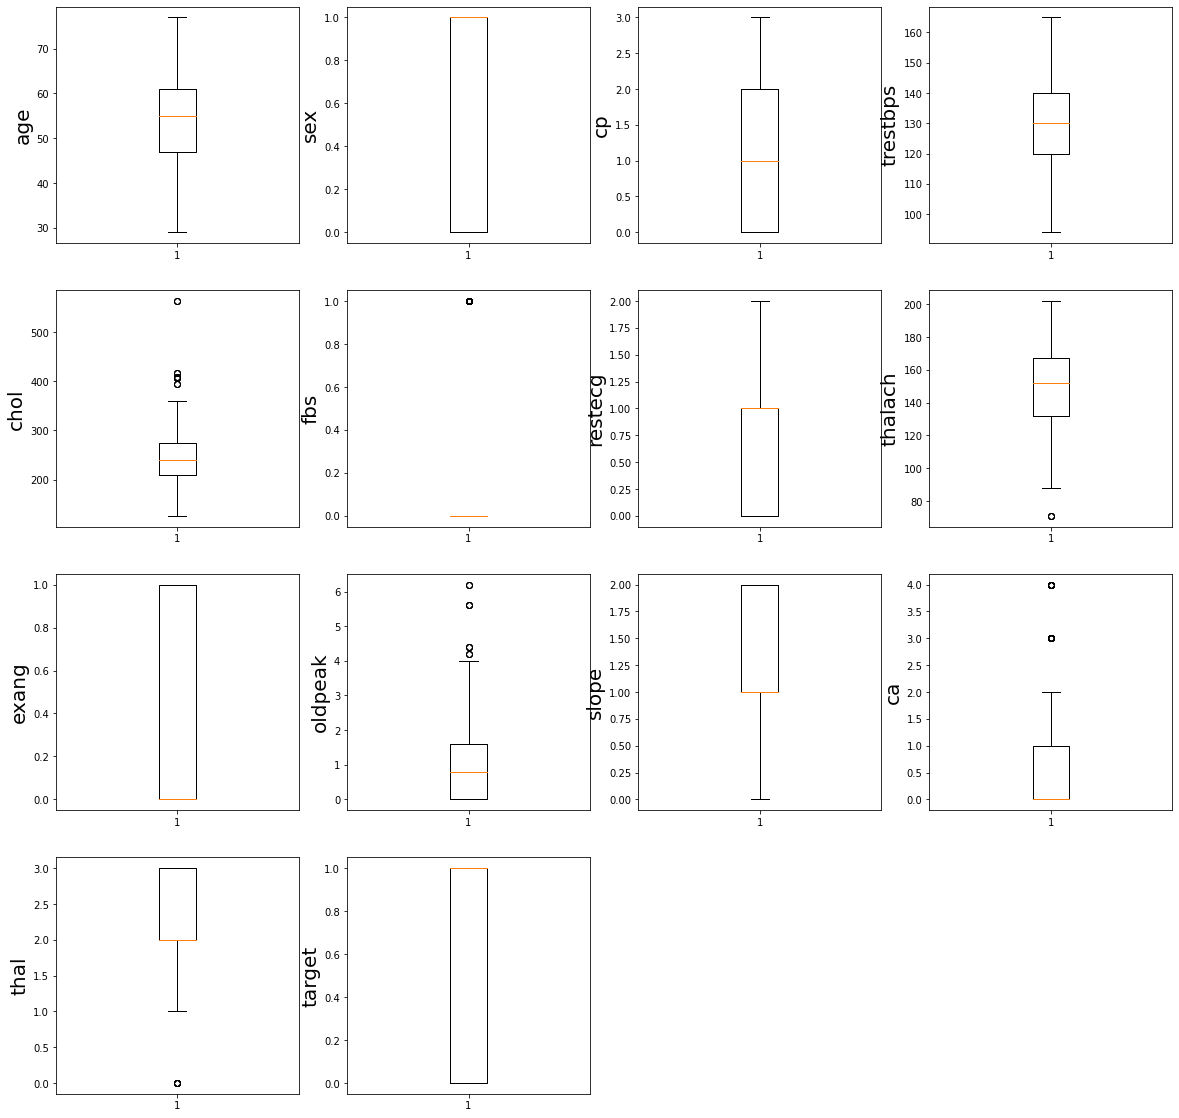

In [14]:
## Using boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in data_cleaned.columns:
    if plotnumber<15 :     # as there are 14columns in the data
        plt.subplot(4,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
        plt.boxplot(data_cleaned[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### removing outliers from chol columns

IQR_upper_limit for column chol : 371
IQR_lower_limit for column chol : 111
outliers on right side in chol is 
 123    417
158    564
179    409
192    564
255    394
450    407
464    564
481    407
542    394
578    394
641    409
665    417
685    407
889    407
958    417
996    409
Name: chol, dtype: int64 



{'whiskers': [<matplotlib.lines.Line2D at 0x7f53fe1c9090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5400241390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5400220ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5400241a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5400241d90>],
 'means': []}

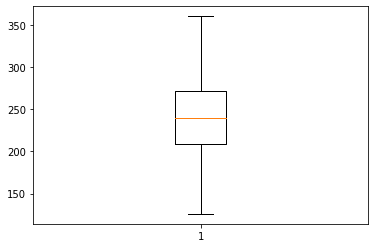

In [15]:
q3=data_cleaned["chol"].quantile(q=0.75)
q1=data_cleaned["chol"].quantile(q=0.25)
IQR=q3-q1
     ## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column chol :",IQR_upper_limit)
print("IQR_lower_limit for column chol :",IQR_lower_limit)
## find and treating outliers-both lower and upper end
k1=data_cleaned[data_cleaned["chol"]>IQR_upper_limit]
print("outliers on right side in chol is \n",k1["chol"],"\n")
data_cleaned=data_cleaned[data_cleaned["chol"]<IQR_upper_limit]
plt.boxplot(data_cleaned["chol"])

### removing outliers from oldpeak column

IQR_upper_limit for column oldpeak : 4
IQR_lower_limit for column oldpeak : -2
outliers on right side in oldpeak is 
 6       4.4
13      4.2
54      5.6
55      5.6
69      6.2
150     4.4
393     6.2
482     4.2
526     6.2
613     5.6
661     4.4
787     4.2
833     5.6
1013    4.4
Name: oldpeak, dtype: float64 



{'whiskers': [<matplotlib.lines.Line2D at 0x7f53f5a84b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f53f5a6c210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f53f5a84850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f53f5a6c8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f53f5a6cc10>],
 'means': []}

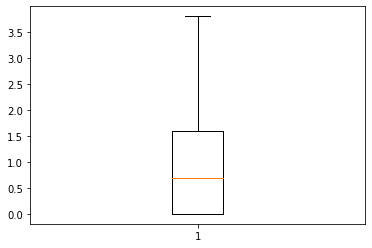

In [16]:
q3=data_cleaned["oldpeak"].quantile(q=0.75)
q1=data_cleaned["oldpeak"].quantile(q=0.25)
IQR=q3-q1
     ## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
print("IQR_upper_limit for column oldpeak :",IQR_upper_limit)
print("IQR_lower_limit for column oldpeak :",IQR_lower_limit)
## find and treating outliers-both lower and upper end
k1=data_cleaned[data_cleaned["oldpeak"]>IQR_upper_limit]
print("outliers on right side in oldpeak is \n",k1["oldpeak"],"\n")
data_cleaned=data_cleaned[data_cleaned["oldpeak"]<IQR_upper_limit]
plt.boxplot(data_cleaned["oldpeak"])

### Detecting  and removing outliers from column thalach

IQR_lower_limit for column oldpeak : 78
outliers on left side in thalach is 
 267    71
296    71
378    71
559    71
Name: thalach, dtype: int64 



{'whiskers': [<matplotlib.lines.Line2D at 0x7f53f5c490d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f53f5c49750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f53f5c4dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f53f5c49e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f53f5c30190>],
 'means': []}

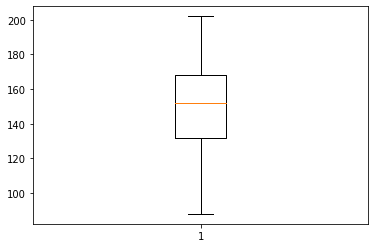

In [17]:
q3=data_cleaned["thalach"].quantile(q=0.75)
q1=data_cleaned["thalach"].quantile(q=0.25)
IQR=q3-q1
     ## Deriving bounderies of outliers
IQR_lower_limit=int(q1-1.5*IQR)
print("IQR_lower_limit for column oldpeak :",IQR_lower_limit)
## find and treating outliers-both lower and upper end
k1=data_cleaned[data_cleaned["thalach"]<IQR_lower_limit]
print("outliers on left side in thalach is \n",k1["thalach"],"\n")
data_cleaned=data_cleaned[data_cleaned["thalach"]>IQR_lower_limit]
plt.boxplot(data_cleaned["thalach"])

### now checking  again outliers in rest of the columns 

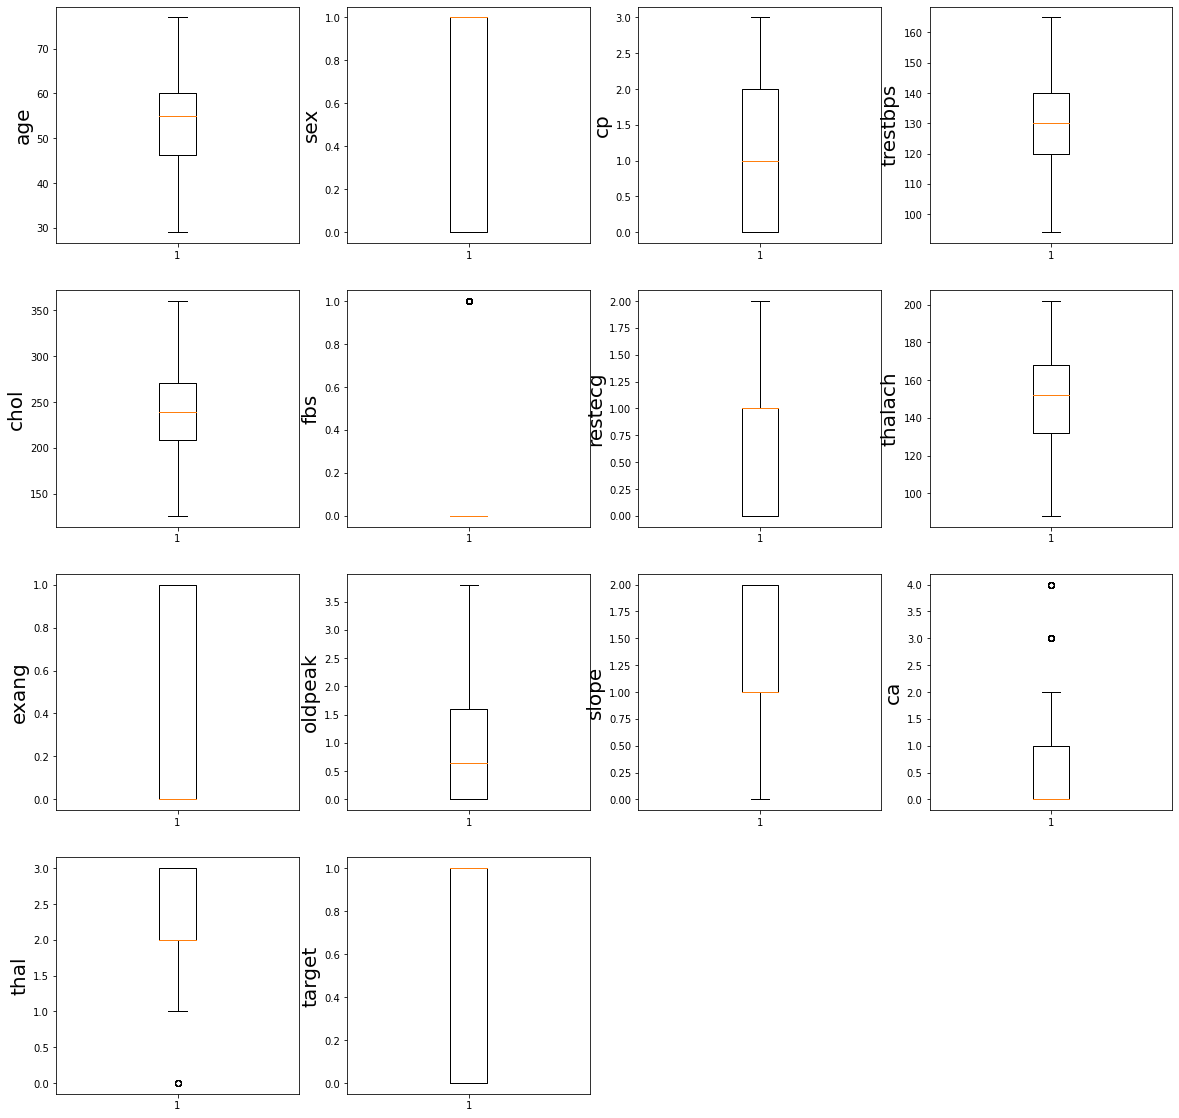

In [18]:
## Using boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in data_cleaned.columns:
    if plotnumber<15 :     # as there are 14columns in the data
        plt.subplot(4,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
        plt.boxplot(data_cleaned[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### shape of data 

In [19]:
data_cleaned.shape

(942, 14)

### after removing outliers data size has been reduced 

### Checking relationship of features with target and with each other using scatter pair plot

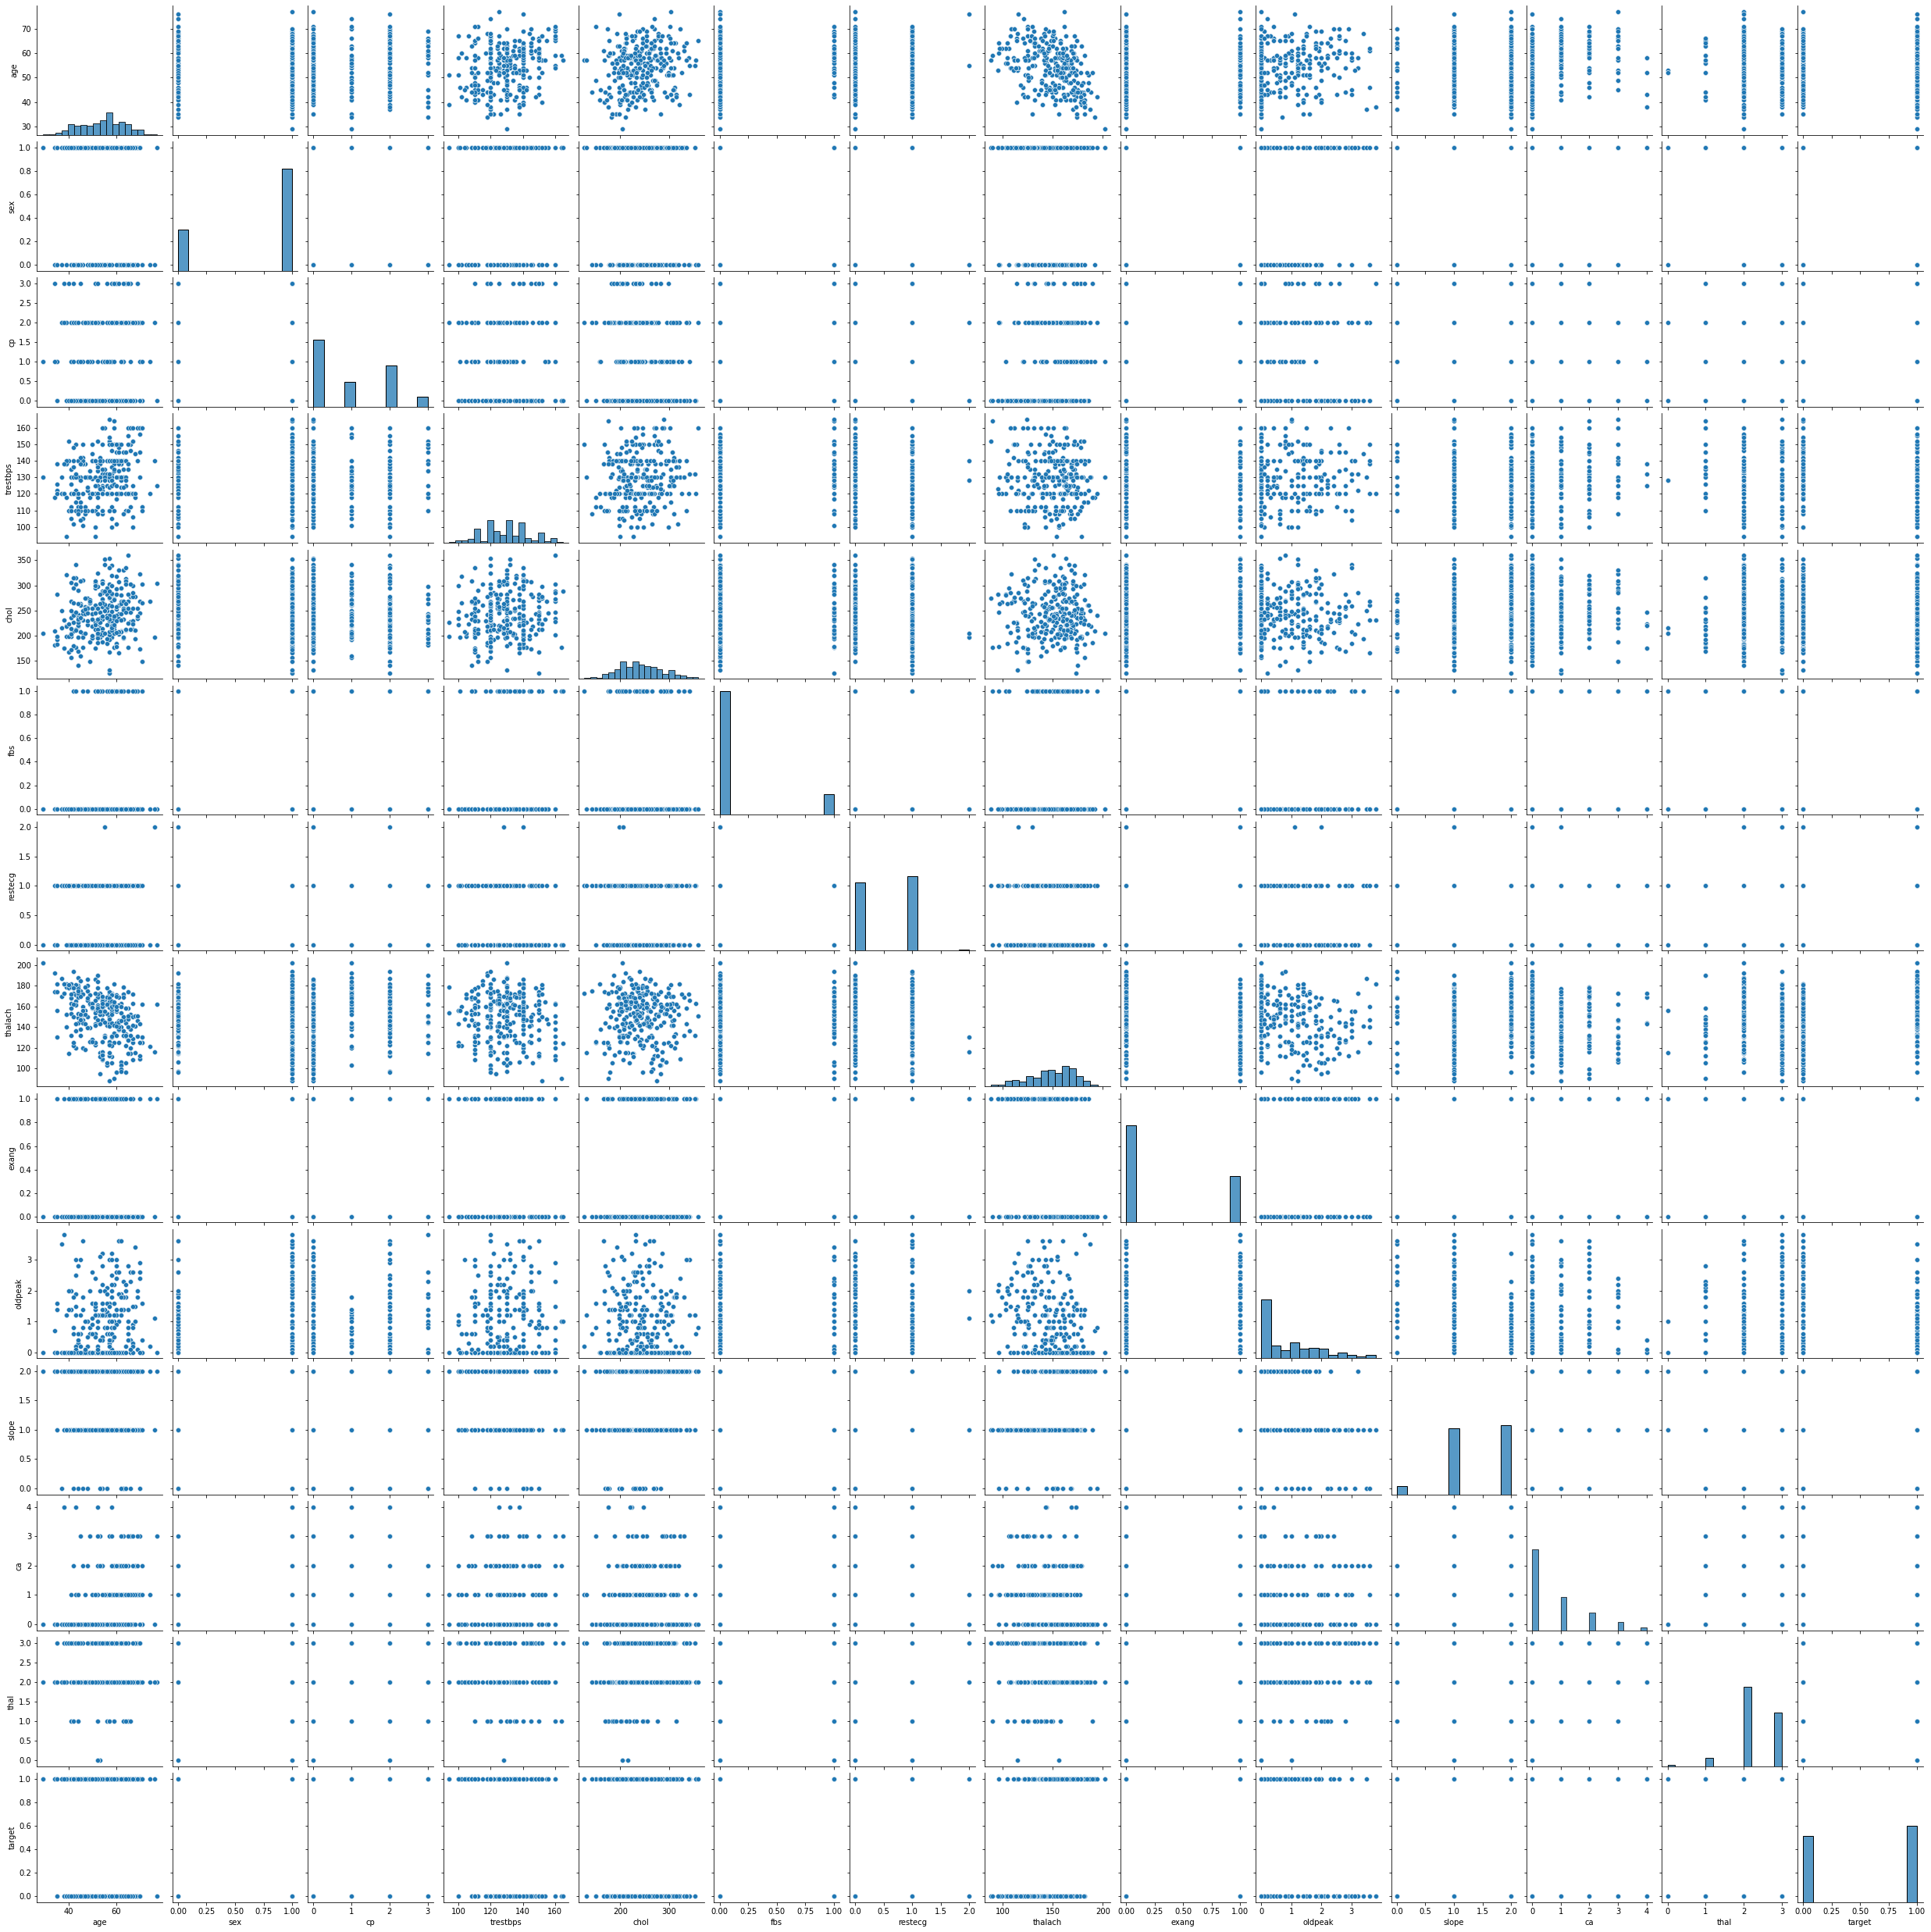

In [20]:
sns.pairplot(data_cleaned)

### Feature Selection :
- Correlation

- Multicollinearity

<AxesSubplot:>

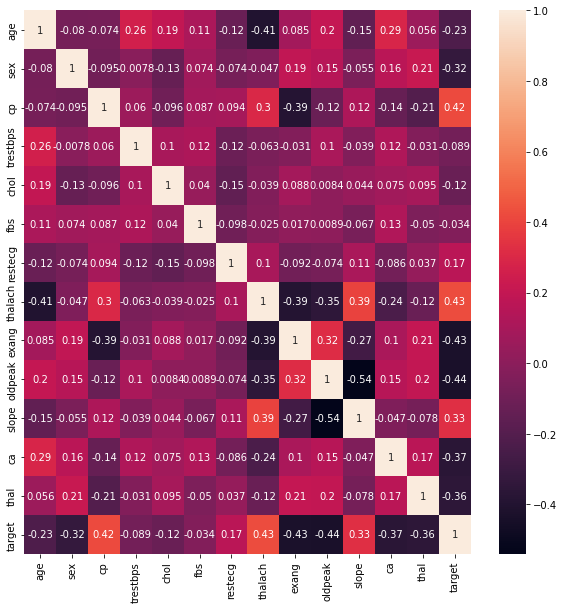

In [21]:
##correlation
plt.figure(figsize=(10,10), facecolor='white')
cor_matrix=data_cleaned.corr()
sns.heatmap(cor_matrix,annot=True)

from above output we can say that none of the features is highly correlated with target variable 

### Check multicollinearity

For multicoolinearity we need to do scaling on features so first seggregate features and target as follows 

In [22]:
x=data_cleaned.drop(columns=["target"])
x  ## features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [23]:
y=data_cleaned["target"]
y  ## target variable

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 942, dtype: int64

### scaling the features 

In [24]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-0.2104257 ,  0.63551146, -0.94554924, ...,  0.96318158,
         1.25744105,  1.13970303],
       [-0.10157287,  0.63551146, -0.94554924, ..., -2.38485181,
        -0.72168922,  1.13970303],
       [ 1.7489253 ,  0.63551146, -0.94554924, ..., -2.38485181,
        -0.72168922,  1.13970303],
       ...,
       [-0.75468987,  0.63551146, -0.94554924, ..., -0.71083511,
         0.26787591, -0.49439173],
       [-0.42813137, -1.57353575, -0.94554924, ...,  0.96318158,
        -0.72168922, -0.49439173],
       [ 0.00727997,  0.63551146, -0.94554924, ..., -0.71083511,
         0.26787591,  1.13970303]])

In [25]:
### computing variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.420976,age
1,1.174680,sex
2,1.273716,cp
3,1.111318,trestbps
4,1.126242,chol
5,1.070486,fbs
6,1.080865,restecg
7,1.643905,thalach
8,1.436146,exang
9,1.594000,oldpeak


### here vif of all features are less than 5 so it means that no multicollinearity exist so we consider all features are significant for prediction model

### Now dividing the data set into training and test data as 80% data for training and 20% data for testing as  follows  :

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.20, random_state = 355) ## giving scaled features

### Getting shape of train and test data

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(753, 13)
(753,)
(189, 13)
(189,)


#### Modelling using logistic  classification algorithm

In [28]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

### Predictions 

In [29]:
## prediction of test data
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

### Model  Evaluation Metrics

#### 1. Confusion Matrix

In [30]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[87, 19],
       [ 8, 75]])

type 1 error is 19 i.e when people were not actually having heart disease but model predicted they had

type 2  error : 8 i.e i.e when people were  actually having heart disease but model predicted they
had not.


#### 2. Accuracy of Model 

In [31]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8571428571428571

### Model Accuracy is 85.7 % i.e correct predictions done by Model

### 3. Precision :

In [32]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Precision = true_positive/(true_positive+false_positive)
Precision

0.8207547169811321

### 4. Recall 



In [33]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9157894736842105

### F1 Score

In [34]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8656716417910448

### ROC(Receiver Operating Characteristic Curve) and Area under curve(auc)

In [35]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8621845874062288

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

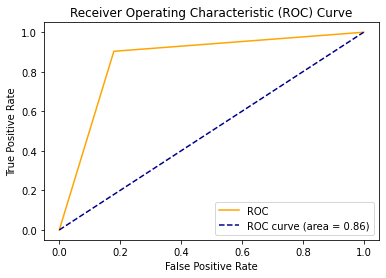

In [37]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Conclusion :

- Accuracy of model : 85.7 using logistic regression algorithm

- AUC - 0.862
    
    We may use others prediction model in order to compare the accuracy  and AUC of the model , the model which gives highest AUC value will be the best model to use for this data . 